# PSI3471 - Exercício 3
### Fernando Zolubas Preto - NUSP: 10694192
### Vinícius Melo de Souza - NUSP: 10772272
# MLP

Implementar uma rede neural e utilizar o treinamento com o algoritmo de retropropagação para modelar as seguintes funções:

1. $ f(x) = \frac{1}{x}, 1 \leq x \leq 100 $

2. $ f(x) = log_{10}x, 1 \leq x \leq 10 $

3. $ f(x) = exp(-x), 1 \leq x \leq 10 $

4. $ f(x) = sen(x), 1 \leq x \leq \frac{pi}{2} $

A rede neural implementada terá uma entrada, um número variável de neurônios da camada oculta e uma saída. A sugestão é implementar em duas etapas:

1. Treinamento: Recebe sinal de entrada, o passo de adaptação, o número de épocas, e o número de neuronios da camada oculta e retorna os pesos da rede treinada e um sinal com o valor da função custo ao longo das épocas;
2. Inferência: Recebe os pesos da rede, o número de neurônios na camada oculta e uma entrada e retorna a saída da rede.

Outros pontos
- Estaremos utilizando a função sigmoidal como função de ativação para os neurônios da camada oculta e da camada de saída
- Implementação apenas com vetores, tensores e operações aritiméticas
- Dois conjuntos de dados, treinamento com 1000 à 10000 dados e teste com 1000
- Desempenho de cada caso será analisado através do erro quadrático médio, considerando: 3,4,5,10,15,20,50,100 neuronios na camada oculta

In [335]:
import numpy as np
import matplotlib.pyplot as plt

Primeiro passo, definir as 4 funções, gerar os dados de treino e de teste para cada uma, definir a função sigmoidal

In [336]:
n_treino = 10000
n_teste = 1000

# Função sigmoidal
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Função derivada da sigmoidal
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Função 1
def f1(x):
    return 1 / x

# Dados de treinamento
x1_treino = np.random.uniform(low=1, high=60, size=(n_treino, 1))
x1_treino = np.sort(x1_treino, axis=0) # ordena os valores de x em ordem crescente
y1_treino = f1(x1_treino)

# Dados de teste
x1_teste = np.random.uniform(low=61, high=100, size=(n_teste, 1))
x1_teste = np.sort(x1_teste, axis=0) # ordena os valores de x em ordem crescente
y1_teste = f1(x1_teste)

# Função 2
def f2(x):
    return np.log10(x)

# Dados teste
x2_treino = np.random.uniform(low=1, high=6, size=(n_treino, 1))
x2_treino = np.sort(x2_treino, axis=0) # ordena os valores de x em ordem crescente
y2_treino = f2(x2_treino)

# Dados de teste
x2_teste = np.random.uniform(low=7, high=10, size=(n_teste, 1))
x2_teste = np.sort(x2_teste, axis=0) # ordena os valores de x em ordem crescente
y2_teste = f2(x2_teste)

# Função 3
def f3(x):
    return np.exp(-x)

# Dados teste
x3_treino = np.random.uniform(low=1, high=6, size=(n_treino, 1))
x3_treino = np.sort(x3_treino, axis=0) # ordena os valores de x em ordem crescente
y3_treino = f3(x3_treino)

# Dados de teste
x3_teste = np.random.uniform(low=7, high=10, size=(n_teste, 1))
x3_teste = np.sort(x3_teste, axis=0) # ordena os valores de x em ordem crescente
y3_teste = f3(x3_teste)

# Função 4
def f4(x):
    return np.sin(x)

# Dados teste
x4_treino = np.random.uniform(low=0, high=(3/4)*np.pi/2, size=(n_treino, 1))
x4_treino = np.sort(x4_treino, axis=0) # ordena os valores de x em ordem crescente
y4_treino = f4(x4_treino)

# Dados de teste
x4_teste = np.random.uniform(low=(3/4)*np.pi/2, high=np.pi/2, size=(n_teste, 1))
x4_teste = np.sort(x4_teste, axis=0) # ordena os valores de x em ordem crescente
y4_teste = f4(x4_teste)

Vejamos a seguir os gráficos das funções consideradas


In [337]:
def plotgraf(x,y,title):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.show()

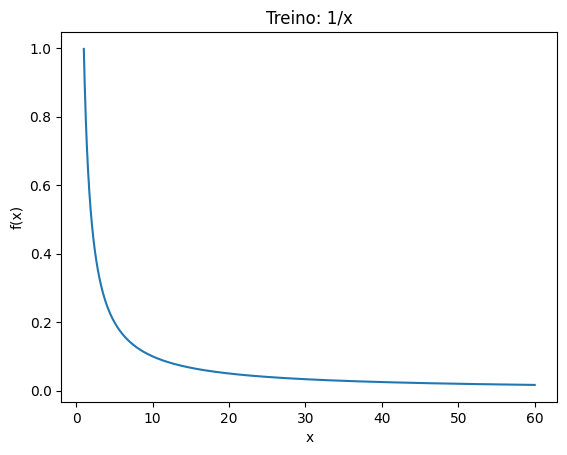

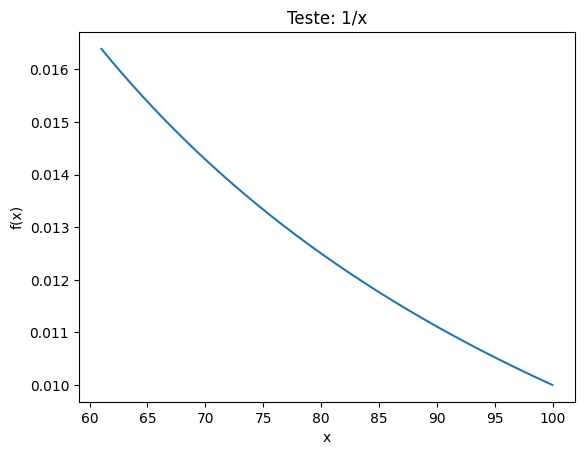

In [338]:
plotgraf(x1_treino,y1_treino,'Treino: 1/x')
plotgraf(x1_teste,y1_teste,'Teste: 1/x')

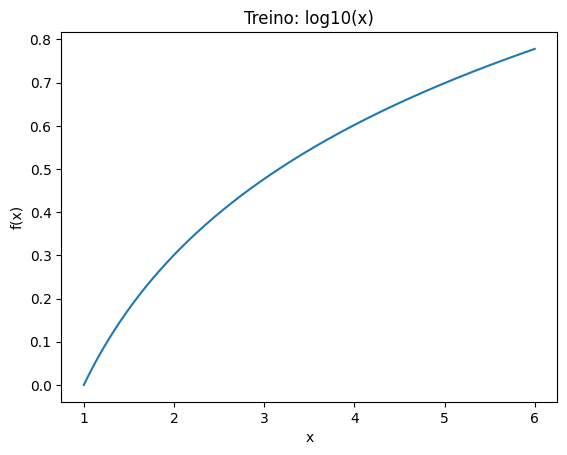

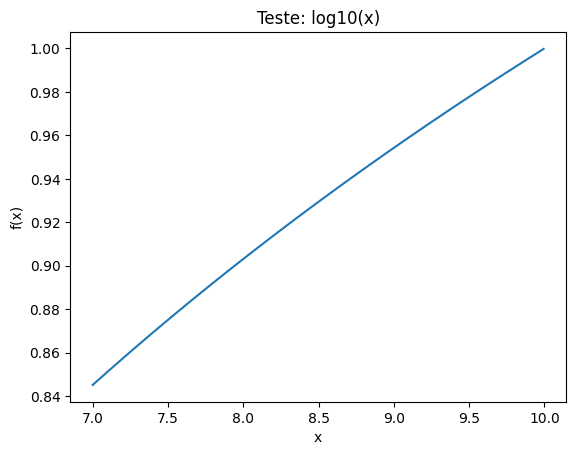

In [339]:
plotgraf(x2_treino,y2_treino,'Treino: log10(x)')
plotgraf(x2_teste,y2_teste,'Teste: log10(x)')

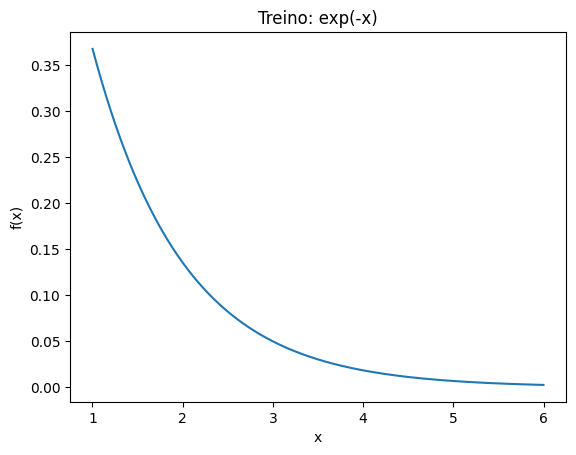

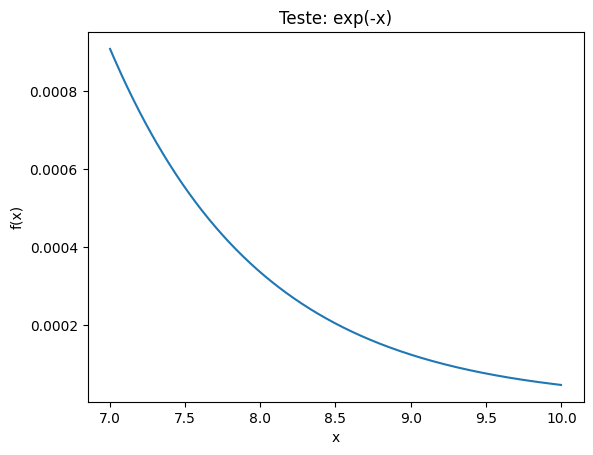

In [340]:
plotgraf(x3_treino,y3_treino,'Treino: exp(-x)')
plotgraf(x3_teste,y3_teste,'Teste: exp(-x)')

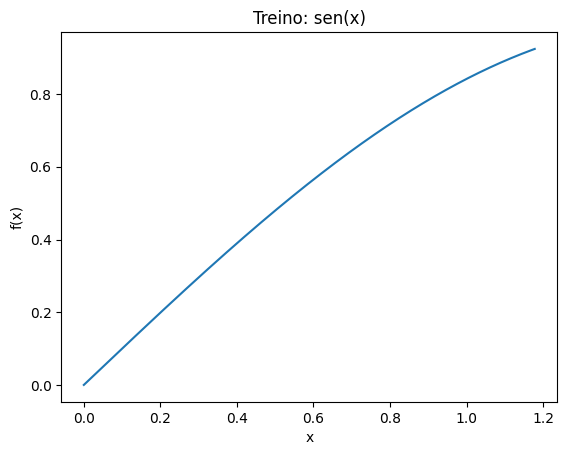

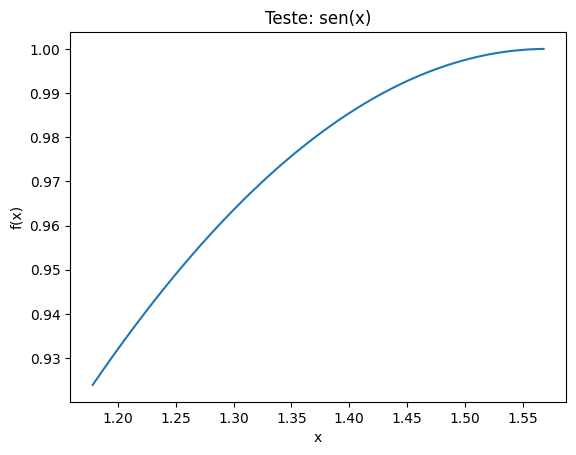

In [341]:
plotgraf(x4_treino,y4_treino,'Treino: sen(x)')
plotgraf(x4_teste,y4_teste,'Teste: sen(x)')

Próximo passo: função forward. Responsável por calcular o output da rede neural de forma progressiva, ou seja, ela recebe a entrada (X) da rede e, a partir dela, calcula os valores das camadas ocultas e da camada de saída até obter o output final (Y).

Esse processo é chamado de "forward propagation" ou propagação direta. A função forward utiliza os parâmetros (pesos) da rede para fazer os cálculos, e esses parâmetros são atualizados durante o processo de treinamento por meio do algoritmo de backpropagation:

- X: os dados de entrada que serão passados pela rede neural para gerar as previsões.
- W1: os pesos que conectam as entradas aos neurônios da camada oculta.
- b1: os bias (viéses) que serão adicionados à soma ponderada das entradas.
- W2: os pesos que conectam os neurônios da camada oculta aos neurônios da camada de saída.
- b2: o bias (viés) que será adicionado à soma ponderada das entradas da camada de saída.
- A1 é a ativação da camada oculta, calculada como a saída da função de ativação aplicada aos neurônios da camada oculta.
- Z1 é a entrada ponderada para a camada oculta, que é a soma das multiplicações dos pesos com as entradas adicionado ao viés da camada oculta.
- Y é a ativação da camada de saída, calculada como a saída da função de ativação aplicada aos neurônios da camada de saída.

In [342]:
def forward(X, W1, b1, W2, b2):
    # camada oculta
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    # camada de saída
    Z2 = np.dot(A1, W2) + b2
    Y = Z2

    return A1, Z1, Y

E agora, vamos fazer a função backward. responsável por calcular os gradientes da rede neural e atualizar os pesos para minimizar o erro da rede. 

In [343]:
def backward(X, Y, T, W1, b1, W2, b2, A1, Z1):
    # Calcula a derivada da função de custo em relação à saída da rede
    dY = 2 * (Y - T) / Y.size
    
    # Calcula a derivada da função de custo em relação aos pesos e bias da camada de saída
    dW2 = np.dot(A1.T, dY)
    db2 = dY.sum(axis=0)
    
    # Calcula a derivada da função de custo em relação aos pesos e bias da camada oculta
    dZ1 = np.dot(dY, W2.T) * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = dZ1.sum(axis=0)
    
    return dW1, db1, dW2, db2

In [344]:
# função de custo para avaliar o desempenho da rede
def cost(Y, T):
    return np.mean((Y - T) ** 2)

Feitas as funções, podemos usar elas para a função de treinamento e a função de inferencia:

In [345]:
def treinamento(x_treino, y_treino, eta, n_epocas, n_oculta):
    n_entradas = x_treino.shape[1]
    n_saidas = y_treino.shape[1]
    
    # inicializa os pesos da rede
    W1 = np.random.randn(n_entradas, n_oculta)
    b1 = np.ones((1, n_oculta))
    W2 = np.random.randn(n_oculta, n_saidas)
    b2 = np.ones((1, n_saidas))
    
    # armazena a evolução do custo ao longo das épocas
    custos = []
    
    # loop de treinamento
    for epoca in range(n_epocas):
        # propagação para frente
        A1, Z1, Y = forward(x_treino, W1, b1, W2, b2)
        
        # calcula o custo da rede atual
        custo = cost(Y, y_treino)
        custos.append(custo)
        
        # backpropagation
        dW1, db1, dW2, db2 = backward(x_treino, Y, y_treino, W1, b1, W2, b2, A1, Z1)
        
        # atualiza os pesos da rede
        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2
    
    return W1, b1, W2, b2, custos


In [346]:
def inference(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    Y = Z2
    return Y

E agora, podemos calcular para cada uma das 4 funções, com diferentes numeros de neuronios na camada oculta, o desempenho e comparar com o MSE!

In [347]:
# definir parâmetros da rede
n_input = 1  # número de variáveis de entrada
n_hidden = [3, 4, 5, 10, 15, 20, 50, 100]  # número de neurônios na camada oculta
n_output = 1  # número de variáveis de saída
eta = 0.005  # passo de adaptação
n_epochs = 5000  # número de épocas

Treinando para n_hidden = 3
MSE para n_hidden = 3: [0.00040413]
Treinando para n_hidden = 4
MSE para n_hidden = 4: [0.00084719]
Treinando para n_hidden = 5
MSE para n_hidden = 5: [0.00053221]
Treinando para n_hidden = 10
MSE para n_hidden = 10: [0.00024971]
Treinando para n_hidden = 15
MSE para n_hidden = 15: [0.00025633]
Treinando para n_hidden = 20
MSE para n_hidden = 20: [0.00015339]
Treinando para n_hidden = 50
MSE para n_hidden = 50: [6.49980109e-05]
Treinando para n_hidden = 100
MSE para n_hidden = 100: [0.00130129]


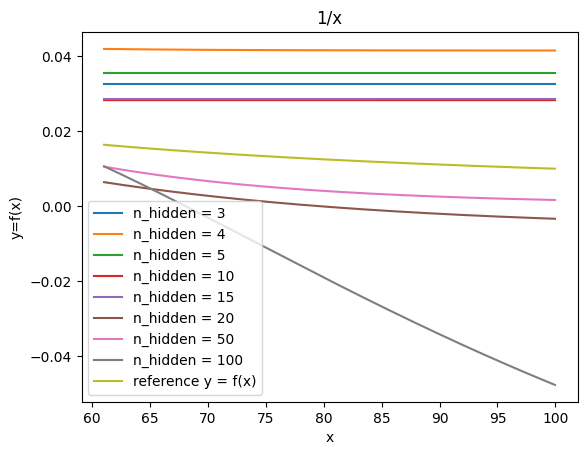

In [348]:
# Calculo para a função 1

fig, ax = plt.subplots()

# Loop pelos números de neurônios na camada oculta
for n in n_hidden:
    print(f"Treinando para n_hidden = {n}")
    resultado_treinamento = treinamento(x1_treino, y1_treino, eta, n_epochs, n)
    pesos = resultado_treinamento[:-1]
    
    # inference
    W1, b1, W2, b2 = pesos
    y1_pred = inference(x1_teste, W1, b1, W2, b2)
    
    # calcula o MSE
    mse = 0
    for i in range(len(y1_teste)):
        mse += (y1_teste[i] - y1_pred[i])**2
    mse = mse / len(y1_teste)
    print(f"MSE para n_hidden = {n}: {mse}")

    myLabel = 'n_hidden = ' + str(n)

    ax.plot(x1_teste, y1_pred, label=myLabel)

# Add title and axis labels
ax.plot(x1_teste, y1_teste, label='reference y = f(x)')
ax.set_title('1/x')
ax.set_xlabel('x')
ax.set_ylabel('y=f(x)')
# Add legend
ax.legend()
# Display the plot
plt.show()

Treinando para n_hidden = 3
MSE para n_hidden = 3: [0.01951932]
Treinando para n_hidden = 4
MSE para n_hidden = 4: [0.01653383]
Treinando para n_hidden = 5
MSE para n_hidden = 5: [0.0353052]
Treinando para n_hidden = 10
MSE para n_hidden = 10: [0.02019794]
Treinando para n_hidden = 15
MSE para n_hidden = 15: [0.0012989]
Treinando para n_hidden = 20
MSE para n_hidden = 20: [0.00950304]
Treinando para n_hidden = 50
MSE para n_hidden = 50: [0.0017378]
Treinando para n_hidden = 100
MSE para n_hidden = 100: [0.00551024]


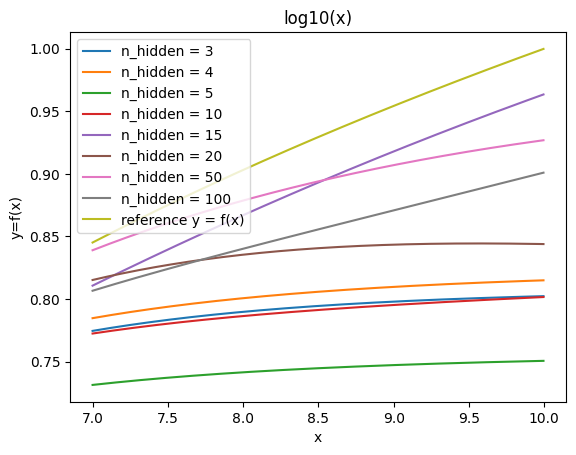

In [349]:
# Calculo para a função 2

fig, ax = plt.subplots()

# Loop pelos números de neurônios na camada oculta
for n in n_hidden:
    print(f"Treinando para n_hidden = {n}")
    resultado_treinamento = treinamento(x2_treino, y2_treino, eta, n_epochs, n)
    pesos = resultado_treinamento[:-1]
    
    # inference
    W1, b1, W2, b2 = pesos
    y2_pred = inference(x2_teste, W1, b1, W2, b2)
    
    # calcula o MSE
    mse = 0
    for i in range(len(y2_teste)):
        mse += (y2_teste[i] - y2_pred[i])**2
    mse = mse / len(y2_teste)
    print(f"MSE para n_hidden = {n}: {mse}")

    myLabel = 'n_hidden = ' + str(n)

    ax.plot(x2_teste, y2_pred, label=myLabel)

# Add title and axis labels
ax.plot(x2_teste, y2_teste, label='reference y = f(x)')
ax.set_title('log10(x)')
ax.set_xlabel('x')
ax.set_ylabel('y=f(x)')
# Add legend
ax.legend()
# Display the plot
plt.show()

Treinando para n_hidden = 3
MSE para n_hidden = 3: [0.00273038]
Treinando para n_hidden = 4
MSE para n_hidden = 4: [6.02846079e-05]
Treinando para n_hidden = 5
MSE para n_hidden = 5: [0.00269766]
Treinando para n_hidden = 10
MSE para n_hidden = 10: [0.02650039]
Treinando para n_hidden = 15
MSE para n_hidden = 15: [0.00220473]
Treinando para n_hidden = 20
MSE para n_hidden = 20: [0.00068777]
Treinando para n_hidden = 50
MSE para n_hidden = 50: [2.57712575e-05]
Treinando para n_hidden = 100
MSE para n_hidden = 100: [0.02835134]


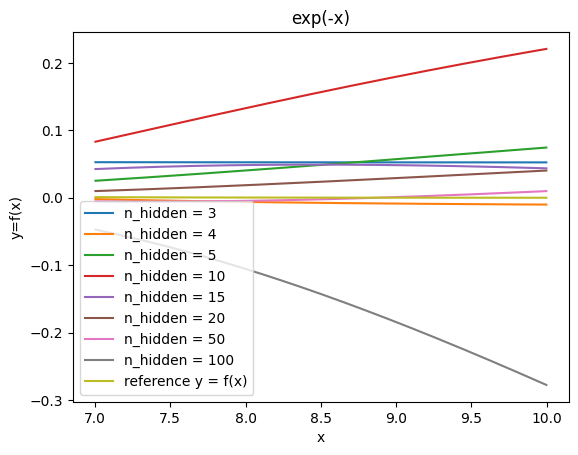

In [350]:
# Calculo para a função 3

fig, ax = plt.subplots()

# Loop pelos números de neurônios na camada oculta
for n in n_hidden:
    print(f"Treinando para n_hidden = {n}")
    resultado_treinamento = treinamento(x3_treino, y3_treino, eta, n_epochs, n)
    pesos = resultado_treinamento[:-1]
    
    # inference
    W1, b1, W2, b2 = pesos
    y3_pred = inference(x3_teste, W1, b1, W2, b2)
    
    # calcula o MSE
    mse = 0
    for i in range(len(y3_teste)):
        mse += (y3_teste[i] - y3_pred[i])**2
    mse = mse / len(y3_teste)
    print(f"MSE para n_hidden = {n}: {mse}")

    myLabel = 'n_hidden = ' + str(n)

    ax.plot(x3_teste, y3_pred, label=myLabel)

# Add title and axis labels
ax.plot(x3_teste, y3_teste, label='reference y = f(x)')
ax.set_title('exp(-x)')
ax.set_xlabel('x')
ax.set_ylabel('y=f(x)')
# Add legend
ax.legend()
# Display the plot
plt.show()

Treinando para n_hidden = 3
MSE para n_hidden = 3: [0.0312042]
Treinando para n_hidden = 4
MSE para n_hidden = 4: [0.00952037]
Treinando para n_hidden = 5
MSE para n_hidden = 5: [0.00537148]
Treinando para n_hidden = 10
MSE para n_hidden = 10: [0.00241351]
Treinando para n_hidden = 15
MSE para n_hidden = 15: [0.03183785]
Treinando para n_hidden = 20
MSE para n_hidden = 20: [0.08615021]
Treinando para n_hidden = 50
MSE para n_hidden = 50: [0.02203413]
Treinando para n_hidden = 100
MSE para n_hidden = 100: [0.06107333]


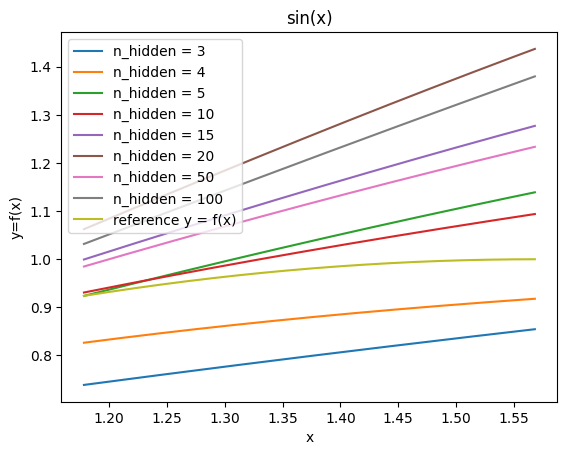

In [351]:
# Calculo para a função 4

# Create the figure and axes
fig, ax = plt.subplots()

# Loop pelos números de neurônios na camada oculta
for n in n_hidden:
    print(f"Treinando para n_hidden = {n}")
    resultado_treinamento = treinamento(x4_treino, y4_treino, eta, n_epochs, n)
    pesos = resultado_treinamento[:-1]
    
    # inference
    W1, b1, W2, b2 = pesos
    y4_pred = inference(x4_teste, W1, b1, W2, b2)
    
    # calcula o MSE
    mse = 0
    for i in range(len(y4_teste)):
        mse += (y4_teste[i] - y4_pred[i])**2
    mse = mse / len(y4_teste)
    print(f"MSE para n_hidden = {n}: {mse}")

    myLabel = 'n_hidden = ' + str(n)

    ax.plot(x4_teste, y4_pred, label=myLabel)

# Add title and axis labels
ax.plot(x4_teste, y4_teste, label='reference y = f(x)')
ax.set_title('sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('y=f(x)')
# Add legend
ax.legend()
# Display the plot
plt.show()

## Resultados obtidos

| Função | MSE 3 Neurônios | MSE 4 Neurônios | MSE 5 Neurônios | MSE 10 Neurônios | MSE 15 Neurônios | MSE 20 Neurônios | MSE 50 Neurônios | MSE 100 Neurônios |
| -------- | -------- | --------  | -------- | -------- | -------- | -------- | -------- | -------- |
| $\frac{1}{x} $       | 0.00040413 | 0.00084719 | 0.00053221 | 0.00024971 | 0.00025633 | 0.00015339 | 6.49980109e-05 | 0.00130129 |
| $ f(x) = log_{10}x $ | 0.01951932 | 0.01653383 | 0.0353052 | 0.02019794 | 0.0012989 | 0.00950304 | 0.0017378 | 0.00551024 |
| $ f(x) = exp(-x) $   | 0.00273038 | 6.02846079e-05 | 0.00269766 | 0.02650039 | 0.00220473 | 0.00068777 | 2.57712575e-05 | 0.02835134 |
| $ f(x) = sen(x) $    | 0.0312042 | 0.00952037 | 0.00537148 | 0.00241351 | 0.03183785 | 0.08615021 | 0.02203413 | 0.06107333 |